# Imports

In [ ]:
!pip install mediapipe opencv-python pandas scikit-learn pipreqs

     |████████████████████████████████| 30.1 MB 13 kB/s 


In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

os.chdir('drive/MyDrive/Workout/Pose_Classification - Tutorial')
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Workout/Pose_Classification - Tutorial'

In [ ]:
def calculateAngle(landmark1, landmark2, landmark3):
    '''
    This function calculates angle between three different landmarks.
    Args:
        landmark1: The first landmark containing the x,y and z coordinates.
        landmark2: The second landmark containing the x,y and z coordinates.
        landmark3: The third landmark containing the x,y and z coordinates.
    Returns:
        angle: The calculated angle between the three landmarks.

    '''

    # Get the required landmarks coordinates.
    x1, y1 = landmark1.x, landmark1.y
    x2, y2 = landmark2.x, landmark2.y
    x3, y3 = landmark3.x, landmark3.y

    # Calculate the angle between the three points
    angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - math.atan2(y1 - y2, x1 - x2))
    
    # Check if the angle is less than zero.
    if angle < 0:

        # Add 360 to the found angle.
        angle += 360
    
    # Return the calculated angle.
    return angle

In [ ]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle

# Detecting

In [ ]:
import mediapipe as mp
import cv2 
from google.colab.patches import cv2_imshow

mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_pose = mp.solutions.pose # Mediapipe Solutions

cap = cv2.imread('Input/angle2.png')

with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5) as holistic:
  image = cv2.cvtColor(cap, cv2.COLOR_BGR2RGB) 
  
  # Make Detections
  results = holistic.process(image)
  # print(results.face_landmarks)

  # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks

  # Recolor image back to BGR for rendering
  image.flags.writeable = True   
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

  # 4. Pose Detections
  mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS, 
                            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                            )
                  
  cv2_imshow(image)

In [ ]:
import mediapipe as mp
import cv2 
from google.colab.patches import cv2_imshow

mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.pose # Mediapipe Solutions

# cap = cv2.VideoCapture('test2.mp4')
# output_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# output_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# fps = int(cap.get(cv2.CAP_PROP_FPS))
# length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# fourcc = cv2.VideoWriter_fourcc(*'XVID')
# output_video = cv2.VideoWriter('Output/curl1_out.mp4', fourcc, fps, (output_width, output_height))

cap = cv2.imread('angle.png')
# print(fps)
# Initiate holistic model
with mp_holistic.Pose(static_image_mode=True, min_detection_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
     
        if not ret:
          break
  
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) 
  
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
        #                          mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
        #                          mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        #                          )
        
        # 2. Right hand
        # mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
        #                          mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
        #                          mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        #                          )

        # # 3. Left Hand
        # mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
        #                          mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
        #                          mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        #                          )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
                        
        # cv2.imshow('Raw Webcam Feed', image)
        # output_video.write(image)
        cv2_imshow(image)
        break
        # if cv2.waitKey(10) & 0xFF == ord('q'):
        #     break

cap.release()
output_video.release()
# cv2.destroyAllWindows()

# Creating Data

In [ ]:
import pandas as pd

df = pd.read_csv('BigData.csv')

mask = df[df['class'] == "'walk/stand'"].index
df.loc[mask, 'class'] = 'walk/stand'

print(df['class'].unique())

print(df.head())

['curl' 'overhead' 'walk/stand' 'bench']
  class        x1        y1        z1  ...       x33       y33       z33       v33
0  curl  0.559250  0.235934  0.055676  ...  0.574204  1.079255  0.351530  0.350431
1  curl  0.553612  0.232897  0.081429  ...  0.565146  1.104820  0.284626  0.329734
2  curl  0.553702  0.234678  0.121289  ...  0.559346  1.110212  0.242503  0.300560
3  curl  0.548705  0.235940  0.093276  ...  0.569646  1.115867  0.234625  0.087365
4  curl  0.549050  0.236047  0.103626  ...  0.572429  1.115060  0.224521  0.123270

[5 rows x 133 columns]


In [ ]:
df.to_csv('new.csv', index=False)

In [ ]:
import csv 
import numpy as np

num_coords = len(results.pose_landmarks.landmark)

landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]


with open('BigData.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [ ]:
import os 

print([i for i in os.listdir('Input/Custom') if i.startswith('walk')])

['walking6.mp4', 'walking7.mp4', 'walking8.mp4', 'walking1.mp4', 'walkingME.mp4', 'walking.mp4']


In [ ]:
class_name = "'walk/stand'"

In [ ]:
import mediapipe as mp
import cv2 
import csv
import pandas as pd
import numpy as np
import os
from google.colab.patches import cv2_imshow

for i in ['walking6.mp4', 'walking7.mp4', 'walking8.mp4']:
  mp_drawing = mp.solutions.drawing_utils # Drawing helpers
  mp_holistic = mp.solutions.pose # Mediapipe Solutions

  cap = cv2.VideoCapture('Input/Custom/'+i)
  fps = int(cap.get(cv2.CAP_PROP_FPS))

  print(fps)
  # Initiate holistic model
  with mp_holistic.Pose(static_image_mode=True, min_detection_confidence=0.7) as holistic:
      
      while cap.isOpened():
          ret, frame = cap.read()
              
          if not ret:
            break
          
          # Recolor Feed
          image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
          image.flags.writeable = False        
          
          # Make Detections
          results = holistic.process(image)
          # print(results.face_landmarks)
          
          # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
          
          # Recolor image back to BGR for rendering
          image.flags.writeable = True   
          image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
          
          # 1. Draw face landmarks
          # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
          #                         mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
          #                         mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
          #                         )
          
          # # 2. Right hand
          # mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
          #                         mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
          #                         mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
          #                         )

          # # 3. Left Hand
          # mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
          #                         mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
          #                         mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
          #                         )

          # 4. Pose Detections
          mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                  )
          # Export coordinates
          try:
              # Extract Pose landmarks
              pose = results.pose_landmarks.landmark
              row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
              
              # # Extract Face landmarks
              # face = results.face_landmarks.landmark
              # face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
              
              # Concate rows
              # row = pose_row+face_row
              
              # Append class name 
              row.insert(0, class_name)
              
              # Export to CSV
              with open('BigData.csv', mode='a', newline='') as f:
                  csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                  csv_writer.writerow(row) 
              
          except Exception as e:
              print(e)     

  cap.release()

# Train Custom Model Using Scikit Learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

df = pd.read_csv('BigData.csv')

X = df.drop('class', axis=1) # features
y = df['class'] # target value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
pipelines = {
    # 'lr':make_pipeline(StandardScaler(), LogisticRegression(solver='sag', max_iter=4000)),
    # 'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100)),
    # 'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

fit_models = {}

for algo, pipeline in pipelines.items():
    model = pipeline.fit(X, y)
    fit_models[algo] = model

In [ ]:
# Evaluate
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle

for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

rf 1.0


In [ ]:
with open('BigData.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

# Final

In [ ]:
import pickle 

with open('body_language.pkl', 'rb') as f:
    model = pickle.load(f)

mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.pose # Mediapipe Solutions

cap = cv2.VideoCapture('test.mp4')
output_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
output_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter('Output/test_out.mp4', fourcc, fps, (output_width, output_height))

print(fps)
# Initiate holistic model
with mp_holistic.Pose(static_image_mode=True, min_detection_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
          break
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # # 1. Draw face landmarks
        # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
        #                          mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
        #                          mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        #                          )
        
        # # 2. Right hand
        # mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
        #                          mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
        #                          mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        #                          )

        # # 3. Left Hand
        # mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
        #                          mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
        #                          mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        #                          )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Extract Face landmarks
            # face = results.face_landmarks.landmark
            # face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concate rows
            # row = pose_row+face_row
            
#             # Append class name 
#             row.insert(0, class_name)
            
#             # Export to CSV
#             with open('coords.csv', mode='a', newline='') as f:
#                 csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                 csv_writer.writerow(row) 
            # Make Detections
            X = pd.DataFrame([row])
            body_language_class = model.predict(X)[0]
            body_language_prob = model.predict_proba(X)[0]
            print(body_language_class, body_language_prob)
            
            # Grab ear coords
            coords = tuple(np.multiply(
                            np.array(
                                (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
                                 results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y))
                        , [output_width,output_height]).astype(int))
            
            cv2.rectangle(image, 
                          (coords[0], coords[1]+5), 
                          (coords[0]+len(body_language_class)*20, coords[1]-30), 
                          (245, 117, 16), -1)
            cv2.putText(image, body_language_class, coords, 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # # Get status box
            # cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
            
            # # Display Class
            # cv2.putText(image, 'CLASS'
            #             , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            # cv2.putText(image, body_language_class.split(' ')[0]
            #             , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # # Display Probability
            # cv2.putText(image, 'PROB'
            #             , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            # cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)],2))
            #             , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        except Exception as e:
          print(e)
                        
        output_video.write(image)


cap.release()
output_video.release()

# Model + Angle

In [ ]:
import pickle 
import pandas as pd
import mediapipe as mp
import cv2
import os 
import sys
import numpy as np
import argparse

with open('BigData.pkl', 'rb') as f:
    model = pickle.load(f)

# parse parameters
parser = argparse.ArgumentParser()

parser.add_argument("--input_video_path", type=str)
parser.add_argument("--output_video_path", type=str, default="")
parser.add_argument("--draw_pose", type=int, default=0)

args = parser.parse_args()

input_video_path = args.input_video_path
output_video_path = args.output_video_path
draw_pose = args.draw_pose

if output_video_path == "":
    # output video in same path
    output_video_path = input_video_path.split('.')[0] + "video_output.mp4"

mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.pose # Mediapipe Solutions

cap = cv2.VideoCapture('Input/dumbbells.mp4')
output_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
output_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter('Output/Test/dumbbells_75.mp4', fourcc, fps, (output_width, output_height))

print(fps)

# Curl counter variables
i = 0
j = 0 
k = 0

counter1 = 0 
counter2 = 0 
counter3 = 0

stage1 = None
stage2 = None
stage3 = None

# Initiate holistic model
with mp_holistic.Pose(static_image_mode=True, min_detection_confidence=0.75) as holistic:
  while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
      break
    
    # Recolor Feed
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False        
    
    # Make Detections
    results = holistic.process(image)
    
    # Recolor image back to BGR for rendering
    image.flags.writeable = True   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Pose Detections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                              )
    # Export coordinates
    try:
      # Extract Pose landmarks
      landmarks = results.pose_landmarks.landmark
      row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in landmarks]).flatten())

      # Make Detections
      X = pd.DataFrame([row])
      body_language_class = model.predict(X)[0]
      body_language_prob = model.predict_proba(X)
      # print('Predicted ', body_language_class)

      # Get coordinates
      if body_language_class == 'overhead':
        if landmarks[mp_holistic.PoseLandmark.LEFT_SHOULDER.value].visibility > landmarks[mp_holistic.PoseLandmark.RIGHT_SHOULDER.value].visibility:
          hand = 'left '
          shoulder = [landmarks[mp_holistic.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_SHOULDER.value].y]
          elbow = [landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].y]
          wrist = [landmarks[mp_holistic.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_WRIST.value].y]
          hip = [landmarks[mp_holistic.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_HIP.value].y]
          elbow = [landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].y]
        else:
          hand = 'right '
          shoulder = [landmarks[mp_holistic.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_SHOULDER.value].y]
          elbow = [landmarks[mp_holistic.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_ELBOW.value].y]
          wrist = [landmarks[mp_holistic.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_WRIST.value].y]
          hip = [landmarks[mp_holistic.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_HIP.value].y]
          elbow = [landmarks[mp_holistic.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_ELBOW.value].y]
      

      if body_language_class == 'curl':
        if landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].visibility > landmarks[mp_holistic.PoseLandmark.RIGHT_ELBOW.value].visibility:
          hand = 'left '
          shoulder = [landmarks[mp_holistic.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_SHOULDER.value].y]
          elbow = [landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].y]
          wrist = [landmarks[mp_holistic.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_WRIST.value].y]
          hip = [landmarks[mp_holistic.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_HIP.value].y]
          elbow = [landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].y]
        else:
          hand = 'right '
          shoulder = [landmarks[mp_holistic.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_SHOULDER.value].y]
          elbow = [landmarks[mp_holistic.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_ELBOW.value].y]
          wrist = [landmarks[mp_holistic.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_WRIST.value].y]
          hip = [landmarks[mp_holistic.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_HIP.value].y]
          elbow = [landmarks[mp_holistic.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_ELBOW.value].y]
      

      if body_language_class == 'bench':
        if landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].visibility > landmarks[mp_holistic.PoseLandmark.RIGHT_ELBOW.value].visibility:
          hand = 'left '
          shoulder = [landmarks[mp_holistic.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_SHOULDER.value].y]
          elbow = [landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].y]
          wrist = [landmarks[mp_holistic.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_WRIST.value].y]
          hip = [landmarks[mp_holistic.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_HIP.value].y]
          elbow = [landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].y]
        else:
          hand = 'right '
          shoulder = [landmarks[mp_holistic.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_SHOULDER.value].y]
          elbow = [landmarks[mp_holistic.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_ELBOW.value].y]
          wrist = [landmarks[mp_holistic.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_WRIST.value].y]
          hip = [landmarks[mp_holistic.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_HIP.value].y]
          elbow = [landmarks[mp_holistic.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_ELBOW.value].y]


      # Calculate the angle 
      angle1 = calculate_angle(shoulder, elbow, wrist) # elbow
      print('Angle ', angle1)
      if angle1 > 110 :
        i += 1
        stage1 = "down"
      if (angle1 < 90 and stage1 =='down') and body_language_class == 'curl' and i >= 10: #and body_language_prob[0][0] > 0.95:
        stage1 ="up"
        i = 0 
        counter1 += 1
      
      cv2.putText(image, 
            str(angle1), 
            tuple(np.multiply(elbow, [output_width, output_height]).astype(int)), 
            cv2.FONT_HERSHEY_SIMPLEX, 
            0.5, 
            (255, 255, 255), 
            2, 
            cv2.LINE_AA) # elbow

      #####################################################################

      angle2 = calculate_angle(elbow, shoulder, hip)   # shoulder
      print('Angle ', angle2)
      if angle2 < 100:
        k += 1
        stage2 = "down"
      if (angle2 > 120 and stage2 =='down') and body_language_class == 'overhead' and k >= 10:
        k = 0
        stage2 ="up"
        counter2 += 1 
      
      cv2.putText(image, 
            str(angle2), 
            tuple(np.multiply(shoulder, [output_width, output_height]).astype(int)), 
            cv2.FONT_HERSHEY_SIMPLEX, 
            0.5, 
            (255, 255, 255), 
            2, 
            cv2.LINE_AA) # shoulder

      # brench press
      if angle1 > 120:
        j += 1
        stage3 = "up"
      if angle1 < 90 and (stage3 =='up' and body_language_class == 'bench') and j >= 10: #and body_language_prob[0][0] > 0.95:
        stage3 ="down"
        j = 0 
        counter3 += 1
        

      # Probabilities 
      cv2.rectangle(image,(output_width//2-100, 100),((output_width//2)+150, 160), (245, 117, 16), -1)
      cv2.putText(image, str(body_language_prob) + ' ' + hand + str(i), (output_width//2-80,130), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,0), 2, cv2.LINE_AA)        
        
    except Exception as e:
      exc_type, exc_obj, exc_tb = sys.exc_info()
      print(e, end=' ') 
      print('Line number: ' + str(exc_tb.tb_lineno))
    
    # Curl 
    cv2.rectangle(image, (0,0), (100, 80), (245, 117, 16), -1)
    cv2.putText(image, 'curls', (15,15), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,0), 2, cv2.LINE_AA) # LEFT WORD
    cv2.putText(image, str(counter1), (5,75), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA) # LEFT NUMBER

    # Overhead
    cv2.rectangle(image, (output_width-100,0), (output_width, 80), (245, 117, 16), -1) 
    cv2.putText(image, 'overhead', (output_width-100,15), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,0), 2, cv2.LINE_AA) # LEFT WORD
    cv2.putText(image, str(counter2), (output_width-95,75), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA) # LEFT NUMBER

    # Bench
    cv2.rectangle(image, (output_width//2-50, 0), ((output_width//2)+50, 80), (245, 117, 16), -1) 
    cv2.putText(image, 'bench', (output_width//2-45, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,0), 2, cv2.LINE_AA) # MIDDLe WORD
    cv2.putText(image, str(counter3), (output_width//2-45, 75), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA) # MIDDLe NUMBER

    output_video.write(image)


cap.release()
output_video.release()

In [ ]:
y.unique()

array(['curl', 'overhead', 'walk/stand', 'bench', "'walk/stand'"],
      dtype=object)

In [ ]:
import pickle 
import pandas as pd
import mediapipe as mp
import cv2
import numpy as np
with open('clients_rf.pkl', 'rb') as f:
    model = pickle.load(f)

mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.pose # Mediapipe Solutions

cap = cv2.VideoCapture('Input/Source 5.mp4')
output_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
output_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter('Output/source5_out_85.mp4', fourcc, fps, (output_width, output_height))

print(fps)

# Curl counter variables
counter1 = 0 
counter2 = 0 
stage1 = None
stage2 = None

# Initiate holistic model
with mp_holistic.Pose(static_image_mode=True, min_detection_confidence=0.85) as holistic:
  while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
      break
    
    # Recolor Feed
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False        
    
    # Make Detections
    results = holistic.process(image)
    
    # Recolor image back to BGR for rendering
    image.flags.writeable = True   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Pose Detections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                              )
    # Export coordinates
    try:
      # Extract Pose landmarks
      landmarks = results.pose_landmarks.landmark
      row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in landmarks]).flatten())

      # Make Detections
      X = pd.DataFrame([row])
      body_language_class = model.predict(X)[0]
      print('Predicted ', body_language_class)

      # Get coordinates
      if body_language_class == 'overhead':
        if landmarks[mp_holistic.PoseLandmark.LEFT_SHOULDER.value].visibility > landmarks[mp_holistic.PoseLandmark.RIGHT_SHOULDER.value].visibility:
          shoulder = [landmarks[mp_holistic.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_SHOULDER.value].y]
          elbow = [landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].y]
          wrist = [landmarks[mp_holistic.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_WRIST.value].y]
          hip = [landmarks[mp_holistic.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_HIP.value].y]
          elbow = [landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].y]
        else:
          shoulder = [landmarks[mp_holistic.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_SHOULDER.value].y]
          elbow = [landmarks[mp_holistic.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_ELBOW.value].y]
          wrist = [landmarks[mp_holistic.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_WRIST.value].y]
          hip = [landmarks[mp_holistic.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_HIP.value].y]
          elbow = [landmarks[mp_holistic.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_ELBOW.value].y]
      if body_language_class == 'curl':
        if landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].visibility > landmarks[mp_holistic.PoseLandmark.RIGHT_ELBOW.value].visibility:
          shoulder = [landmarks[mp_holistic.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_SHOULDER.value].y]
          elbow = [landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].y]
          wrist = [landmarks[mp_holistic.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_WRIST.value].y]
          hip = [landmarks[mp_holistic.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_HIP.value].y]
          elbow = [landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_holistic.PoseLandmark.LEFT_ELBOW.value].y]
        else:
          shoulder = [landmarks[mp_holistic.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_SHOULDER.value].y]
          elbow = [landmarks[mp_holistic.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_ELBOW.value].y]
          wrist = [landmarks[mp_holistic.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_WRIST.value].y]
          hip = [landmarks[mp_holistic.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_HIP.value].y]
          elbow = [landmarks[mp_holistic.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_holistic.PoseLandmark.RIGHT_ELBOW.value].y]


      # Calculate the angle 
      angle1 = calculate_angle(shoulder, elbow, wrist) # elbow
      print('Angle ', angle1)
      if angle1 > 90 :
        stage1 = "down"
      if (angle1 < 90 and stage1 =='down') and body_language_class == 'curl':
        stage1 ="up"
        counter1 += 1

      #####################################################################

      angle2 = calculate_angle(elbow, shoulder, hip)   # shoulder
      print('Angle ', angle2)
      if angle2 < 100:
        stage2 = "down"
      if (angle2 > 120 and stage2 =='down') and body_language_class == 'overhead':
        stage2 ="up"
        counter2 += 1          
        
    except Exception as e:
      print(e)
    
    # Curl 
    cv2.rectangle(image, (0,0), (100, 80), (245, 117, 16), -1)
    cv2.putText(image, str(counter1), (20,60), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)

    # Overhead
    cv2.rectangle(image, (image.shape[1]-100,0), (image.shape[1], 80), (245, 117, 16), -1)
    cv2.putText(image, str(counter2), (image.shape[1]-80,60), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
    output_video.write(image)


cap.release()
output_video.release()

In [ ]:
img = cv2.imread('angle.png')
cv2.rectangle(img, (0,0), (100, 80), (245, 117, 16), -1)
cv2.putText(img, str(0), (20,60), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)

cv2.rectangle(img, (img.shape[1]-100,0), (img.shape[1], 80), (245, 117, 16), -1)
cv2.putText(img, str(0), (img.shape[1]-80,60), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
cv2_imshow(img)

# Trial # 2

In [ ]:
import pickle 

with open('body_language.pkl', 'rb') as f:
    model = pickle.load(f)
    
cap = cv2.VideoCapture('test.mp4')

output_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
output_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter('Output/temp.mp4', fourcc, fps, (output_width, output_height))

print(fps)

# Curl counter variables
counter1 = 0 
counter2 = 0 
stage1 = None
stage2 = None

with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.8) as pose:
  while cap.isOpened():
      ret, frame = cap.read()

      if not ret:
        break

      # detect stuff and render
      image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      image.flags.writeable = False

      # Make detection
      results = pose.process(image)
    
      image.flags.writeable = True
      image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

      # Extract Landmarks
      try:
        landmarks = results.pose_landmarks.landmark


            
        # Get coordinates 
        shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
        elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
        wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
        hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
        
        # Calculate angle
        angle1 = calculate_angle(shoulder, elbow, wrist) # elbow
        angle2 = calculate_angle(elbow, shoulder, hip)   # shoulder
        
        # Visualize angle
        cv2.putText(image, 
                    str(angle1), 
                    tuple(np.multiply(elbow, [output_width, output_height]).astype(int)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 
                    0.5, 
                    (255, 255, 255), 
                    2, 
                    cv2.LINE_AA) # elbow
        cv2.putText(image, 
                    str(angle2), 
                    tuple(np.multiply(shoulder, [output_width, output_height]).astype(int)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 
                    0.5, 
                    (255, 255, 255), 
                    2, 
                    cv2.LINE_AA)
        
        # # Curl counter logic - elbow
        # if angle1 > 160:
        #   stage1 = "down"
        # if angle1 < 50 and stage1 =='down':
        #   stage1 ="up"
        #   counter1 +=1
        
        # if angle2 < 50:
        #   stage2 = "down"
        # if angle2 > 120 and stage2 =='down':
        #   stage2 ="up"
        #   counter2 +=1
                    
      except:
        pass


      # # Curl
      # cv2.rectangle(image, (0,0), (80,80), (245,117,16), -1)
      # cv2.putText(image, 'CURL', (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
      # cv2.putText(image, str(counter1), (10,60), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)


      # # Overhead
      # cv2.rectangle(image, (100,0), (180,80), (117,16, 245), -1)
      # cv2.putText(image, 'Overhead', (90,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
      # cv2.putText(image, str(counter2), (83,60), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
    
      # Render Detections
      mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                                mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))
      
      output_video.write(image)
      # cv2_imshow(image)

  cap.release()
  output_video.release()

# Display Angle


In [ ]:
import pickle 
import pandas as pd
import numpy as np
import mediapipe as mp
import cv2
import os

with open('bigData.pkl', 'rb') as f:
    model = pickle.load(f)

mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_pose = mp.solutions.pose # Mediapipe Solutions

cap = cv2.VideoCapture('Input/Source 5.mp4')

output_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
output_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter('Output/Test/rf_source5.mp4', fourcc, fps, (output_width, output_height))

print(fps)

# Curl counter variables
counter1 = 0 
counter2 = 0 
stage1 = None
stage2 = None

with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.8) as pose:
  while cap.isOpened():
      ret, frame = cap.read()

      if not ret:
        break

      # detect stuff and render
      image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      image.flags.writeable = False

      # Make detection
      results = pose.process(image)
    
      image.flags.writeable = True
      image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

      # Extract Landmarks
      try:
        landmarks = results.pose_landmarks.landmark
        row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in landmarks]).flatten())

        # Make Detections
        X = pd.DataFrame([row])
        body_language_class = model.predict(X)[0]
        body_language_p = str(model.predict_proba(X))
        print(body_language_class)

        # Visualize Prediction
        cv2.putText(image, 
                    body_language_class, 
                    (output_width//2, 150), 
                    cv2.FONT_HERSHEY_SIMPLEX, 
                    0.5, 
                    (0, 0, 0), 
                    2, 
                    cv2.LINE_AA)
        
        # Visualize Prediction
        cv2.putText(image, 
                    body_language_p, 
                    (output_width//2, 180), 
                    cv2.FONT_HERSHEY_SIMPLEX, 
                    0.5, 
                    (0, 0, 0), 
                    2, 
                    cv2.LINE_AA)

        # Get coordinates 
        shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
        elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
        wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
        hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
        
        # Calculate angle
        angle1 = calculate_angle(shoulder, elbow, wrist) # elbow
        angle2 = calculate_angle(elbow, shoulder, hip)   # shoulder
        print(angle1, angle2)
        # Visualize angle
        cv2.putText(image, 
                    str(angle1), 
                    tuple(np.multiply(elbow, [output_width, output_height]).astype(int)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 
                    0.5, 
                    (255, 255, 255), 
                    2, 
                    cv2.LINE_AA) # elbow
        cv2.putText(image, 
                    str(angle2), 
                    tuple(np.multiply(shoulder, [output_width, output_height]).astype(int)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 
                    0.5, 
                    (255, 255, 255), 
                    2, 
                    cv2.LINE_AA)
        
        # # Curl counter logic - elbow
        # if angle1 > 160:
        #   stage1 = "down"
        # if angle1 < 50 and stage1 =='down':
        #   stage1 ="up"
        #   counter1 +=1
        
        # if angle2 < 50:
        #   stage2 = "down"
        # if angle2 > 120 and stage2 =='down':
        #   stage2 ="up"
        #   counter2 +=1
                    
      except Exception as e:
        print(e)


      # # Curl
      # cv2.rectangle(image, (0,0), (80,80), (245,117,16), -1)
      # cv2.putText(image, 'CURL', (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
      # cv2.putText(image, str(counter1), (10,60), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)


      # # Overhead
      # cv2.rectangle(image, (100,0), (180,80), (117,16, 245), -1)
      # cv2.putText(image, 'Overhead', (90,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
      # cv2.putText(image, str(counter2), (83,60), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
    
      # Render Detections
      mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2),
                                mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))
      
      output_video.write(image)
      # cv2_imshow(image)

  cap.release()
  output_video.release()

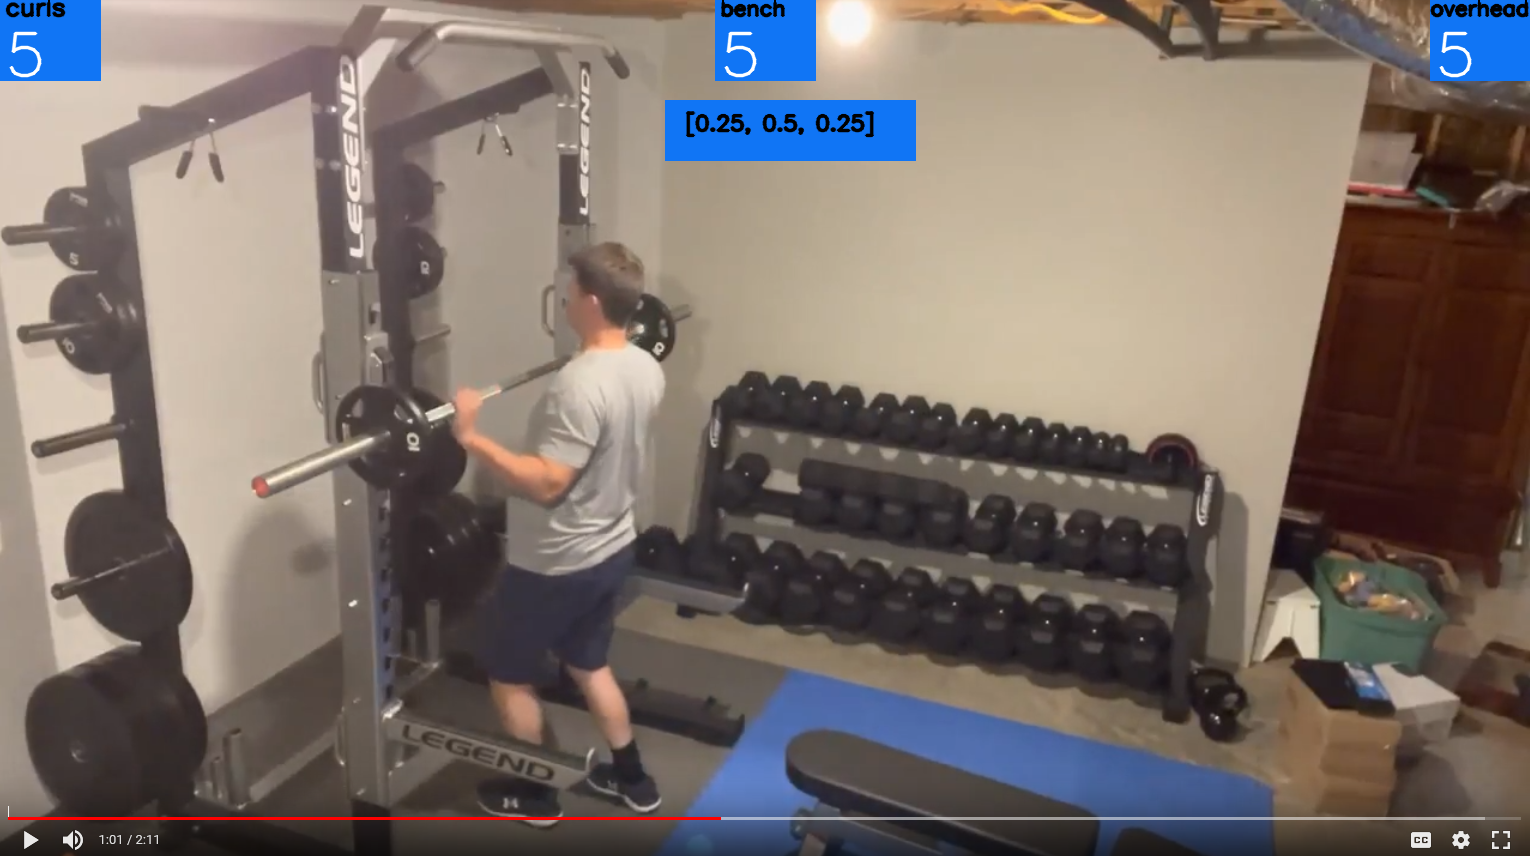

In [ ]:
from google.colab.patches import cv2_imshow

image = cv2.imread('Input/angle.png')
output_width = image.shape[1]

# Curl 
cv2.rectangle(image, (0,0), (100, 80), (245, 117, 16), -1)
cv2.putText(image, 'curls', (5,15), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,0), 2, cv2.LINE_AA) # LEFT WORD
cv2.putText(image, str(5), (5,75), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA) # LEFT NUMBER

# Overhead
cv2.rectangle(image, (output_width-100,0), (output_width, 80), (245, 117, 16), -1) 
cv2.putText(image, 'overhead', (output_width-100,15), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,0), 2, cv2.LINE_AA) # LEFT WORD
cv2.putText(image, str(5), (output_width-95,75), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA) # LEFT NUMBER

# Bench
cv2.rectangle(image, (output_width//2-50, 0), ((output_width//2)+50, 80), (245, 117, 16), -1) 
cv2.putText(image, 'bench', (output_width//2-45, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,0), 2, cv2.LINE_AA) # MIDDLe WORD
cv2.putText(image, str(5), (output_width//2-45, 75), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA) # MIDDLe NUMBER

# Probabilities 
s = [0.25, 0.50, 0.25]
cv2.rectangle(image,(output_width//2-100, 100),((output_width//2)+150, 160), (245, 117, 16), -1)
cv2.putText(image, str(s), (output_width//2-80,130), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,0), 2, cv2.LINE_AA)

cv2_imshow(image)

In [ ]:
!python prediction.py --input_video_path=Input/bench_test.mp4 --output_video_path=Output/Test/git_test.mp4 --draw_pose=1 --info=0